# Backward Facing Step case (BFS)

This example considers a channel with periodic side boundaries, walls at the top and
bottom, and a step at the left with a parabolic inflow. Initially the velocity is an
extension of the inflow, but as time passes the velocity finds a new steady state.

In [1]:
using IncompressibleNavierStokes

if haskey(ENV, "GITHUB_ACTIONS")
    using CairoMakie
else
    using GLMakie
end

Case name for saving results

In [2]:
name = "BackwardFacingStep2D"

"BackwardFacingStep2D"

Floating point type for simulations

In [3]:
T = Float64

Float64

Viscosity model

In [4]:
viscosity_model = LaminarModel{T}(; Re = 3000)
# viscosity_model = KEpsilonModel{T}(; Re = 2000)
# viscosity_model = MixingLengthModel{T}(; Re = 2000)
# viscosity_model = SmagorinskyModel{T}(; Re = 2000)
# viscosity_model = QRModel{T}(; Re = 2000)

LaminarModel{Float64}(3000.0)

Convection model

In [5]:
convection_model = NoRegConvectionModel()
# convection_model = C2ConvectionModel()
# convection_model = C4ConvectionModel()
# convection_model = LerayConvectionModel()

NoRegConvectionModel()

Boundary conditions

In [6]:
u_bc(x, y, t) = x ≈ 0 && y ≥ 0 ? 24y * (1 / 2 - y) : 0.0
v_bc(x, y, t) = 0.0
boundary_conditions = BoundaryConditions(
    u_bc,
    v_bc;
    bc_unsteady = false,
    bc_type = (;
        u = (; x = (:dirichlet, :pressure), y = (:dirichlet, :dirichlet)),
        v = (; x = (:dirichlet, :symmetric), y = (:dirichlet, :dirichlet)),
    ),
    T,
)

BoundaryConditions{Float64}(false, (x = (:dirichlet, :pressure), y = (:dirichlet, :dirichlet)), (x = (:dirichlet, :symmetric), y = (:dirichlet, :dirichlet)), NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple(), Main.var"##315".u_bc, Main.var"##315".v_bc, IncompressibleNavierStokes.var"#43#67"(), IncompressibleNavierStokes.var"#44#68"(), IncompressibleNavierStokes.var"#45#69"(), IncompressibleNavierStokes.var"#46#70"(), (x = (0.0, 0.0), y = (0.0, 0.0)), (x = (0.0, 0.0), y = (0.0, 0.0)), (x = (0.0, 0.0), y = (0.0, 0.0)))

Grid

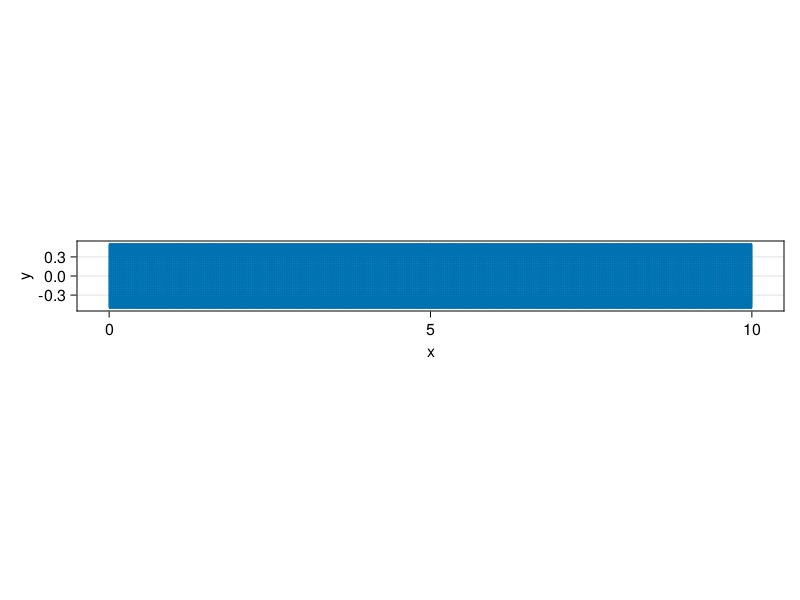

In [7]:
x = stretched_grid(0.0, 10.0, 300)
y = cosine_grid(-0.5, 0.5, 50)
grid = Grid(x, y; boundary_conditions, T);

plot_grid(grid)

Forcing parameters

In [8]:
bodyforce_u(x, y) = 0.0
bodyforce_v(x, y) = 0.0
force = SteadyBodyForce(bodyforce_u, bodyforce_v, grid)

SteadyBodyForce{typeof(Main.var"##315".bodyforce_u), typeof(Main.var"##315".bodyforce_v), Nothing, Float64}(Main.var"##315".bodyforce_u, Main.var"##315".bodyforce_v, nothing, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

Build setup and assemble operators

In [9]:
setup = Setup(; viscosity_model, convection_model, grid, force, boundary_conditions)

Setup{Float64, 2, LaminarModel{Float64}, NoRegConvectionModel, SteadyBodyForce{typeof(Main.var"##315".bodyforce_u), typeof(Main.var"##315".bodyforce_v), Nothing, Float64}}(Grid{Float64, 2}(false, 81.0, 1.125, 300, 50, 1, (0.0, 10.0), (-0.5, 0.5), (0.0, 1.0), [0.0, 0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.2, 0.23333333333333334, 0.26666666666666666, 0.3  …  9.7, 9.733333333333334, 9.766666666666667, 9.8, 9.833333333333332, 9.866666666666667, 9.9, 9.933333333333334, 9.966666666666667, 10.0], [-0.5, -0.4990133642141358, -0.49605735065723894, -0.49114362536434436, -0.48429158056431554, -0.47552825814757677, -0.46488824294412573, -0.45241352623300973, -0.4381533400219318, -0.42216396275100754  …  0.4221639627510074, 0.43815334002193174, 0.4524135262330098, 0.4648882429441257, 0.4755282581475768, 0.48429158056431554, 0.4911436253643443, 0.4960573506572389, 0.4990133642141358, 0.5], Float64[], [0.016666666666666666, 0.05, 0.08333333333333334, 

Pressure solver

In [10]:
pressure_solver = DirectPressureSolver(setup)

DirectPressureSolver{Float64, SuiteSparse.CHOLMOD.Factor{Float64}}(SuiteSparse.CHOLMOD.Factor{Float64}
type:    LDLt
method:  simplicial
maxnnz:  456358
nnz:     271414
success: true
)

Time interval

In [11]:
t_start, t_end = tlims = (0.0, 7.0)

(0.0, 7.0)

Initial conditions (extend inflow)

In [12]:
initial_velocity_u(x, y) = y ≥ 0.0 ? 24y * (1 / 2 - y) : 0.0
initial_velocity_v(x, y) = 0.0
initial_pressure(x, y) = 0.0
V₀, p₀ = create_initial_conditions(
    setup,
    t_start;
    initial_velocity_u,
    initial_velocity_v,
    initial_pressure,
    pressure_solver,
);

Solve steady state problem

In [13]:
problem = SteadyStateProblem(setup, V₀, p₀);
V, p = @time solve(problem);

Initial momentum residual = 6.457364934902437e-5
Iteration 1: momentum residual = 0.00012687300444873896
Iteration 2: momentum residual = 5.695062433805771e-5
Iteration 3: momentum residual = 1.1959443471328687e-5
Iteration 4: momentum residual = 2.1591249468979505e-6
Iteration 5: momentum residual = 3.7365357974030063e-7
Iteration 6: momentum residual = 1.855707706781363e-8
Iteration 7: momentum residual = 1.6315738948151186e-11
  3.638532 seconds (888.96 k allocations: 1.219 GiB, 4.18% gc time, 29.94% compilation time)


Iteration processors

In [14]:
logger = Logger(; nupdate = 1)
plotter = RealTimePlotter(; nupdate = 5, fieldname = :vorticity, type = heatmap)
writer = VTKWriter(; nupdate = 20, dir = "output/$name", filename = "solution")
tracer = QuantityTracer(; nupdate = 10)
# processors = [logger, plotter, writer, tracer]
processors = [logger, plotter, tracer]

3-element Vector{IncompressibleNavierStokes.Processor}:
 Logger(1)
 RealTimePlotter{typeof(MakieCore.heatmap)}(5, :vorticity, MakieCore.heatmap, Observable{Nothing} with 0 listeners. Value:
nothing, Observable{Nothing} with 0 listeners. Value:
nothing)
 QuantityTracer(10, Float64[], Float64[], Float64[], Float64[], Float64[], Float64[])

Solve unsteady problem

Iteration 0	t = 0
Iteration 1	t = 0.002
Iteration 2	t = 0.004
Iteration 3	t = 0.006
Iteration 4	t = 0.008
Iteration 5	t = 0.01
Iteration 6	t = 0.012
Iteration 7	t = 0.014
Iteration 8	t = 0.016
Iteration 9	t = 0.018
Iteration 10	t = 0.02
Iteration 11	t = 0.022
Iteration 12	t = 0.024
Iteration 13	t = 0.026
Iteration 14	t = 0.028
Iteration 15	t = 0.03
Iteration 16	t = 0.032
Iteration 17	t = 0.034
Iteration 18	t = 0.036
Iteration 19	t = 0.038
Iteration 20	t = 0.04
Iteration 21	t = 0.042
Iteration 22	t = 0.044
Iteration 23	t = 0.046
Iteration 24	t = 0.048
Iteration 25	t = 0.05
Iteration 26	t = 0.052
Iteration 27	t = 0.054
Iteration 28	t = 0.056
Iteration 29	t = 0.058
Iteration 30	t = 0.06
Iteration 31	t = 0.062
Iteration 32	t = 0.064
Iteration 33	t = 0.066
Iteration 34	t = 0.068
Iteration 35	t = 0.07
Iteration 36	t = 0.072
Iteration 37	t = 0.074
Iteration 38	t = 0.076
Iteration 39	t = 0.078
Iteration 40	t = 0.08
Iteration 41	t = 0.082
Iteration 42	t = 0.084
Iteration 43	t = 0.086
Iteration 

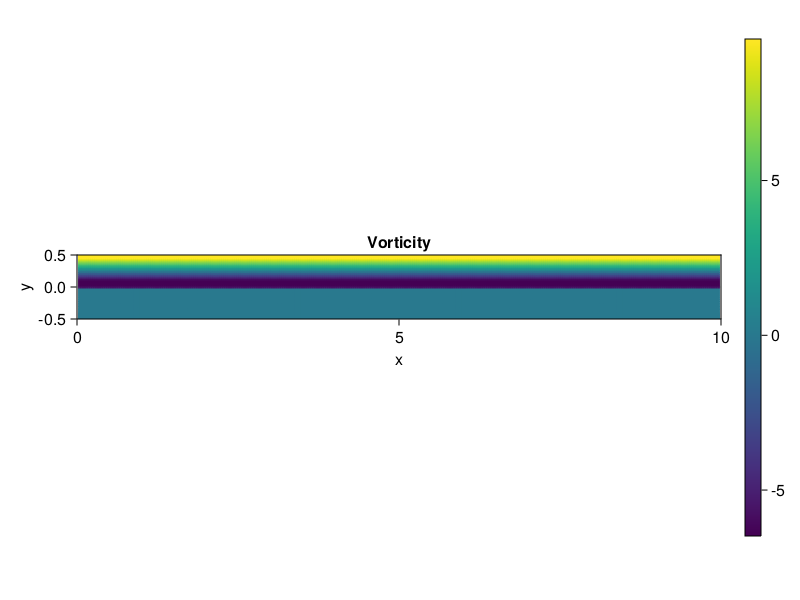

In [15]:
problem = UnsteadyProblem(setup, V₀, p₀, tlims);
V, p = @time solve(problem, RK44(); inplace = true, Δt = 0.002, processors, pressure_solver);

Post-process

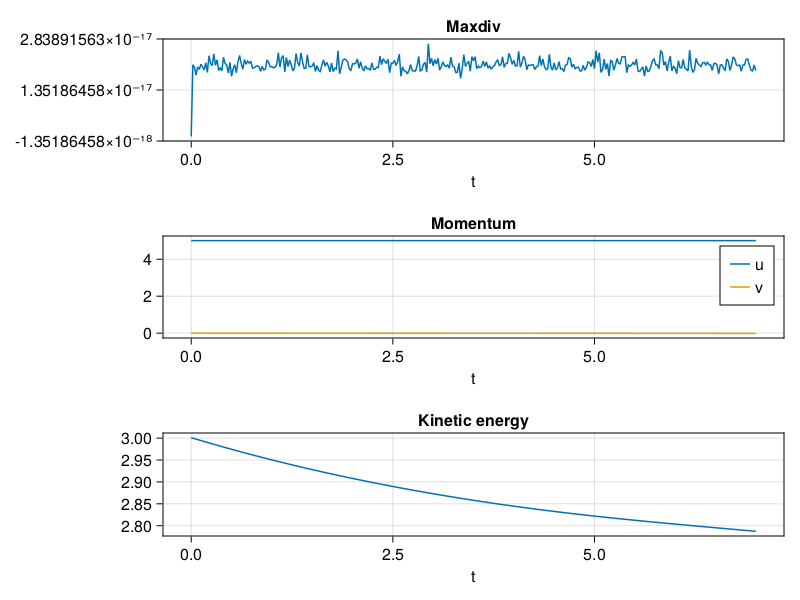

In [16]:
plot_tracers(tracer)

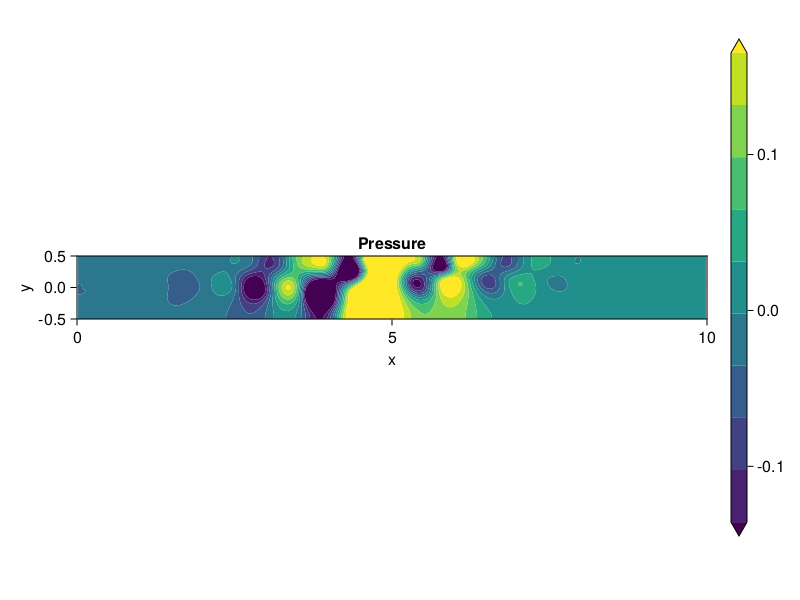

In [17]:
plot_pressure(setup, p)

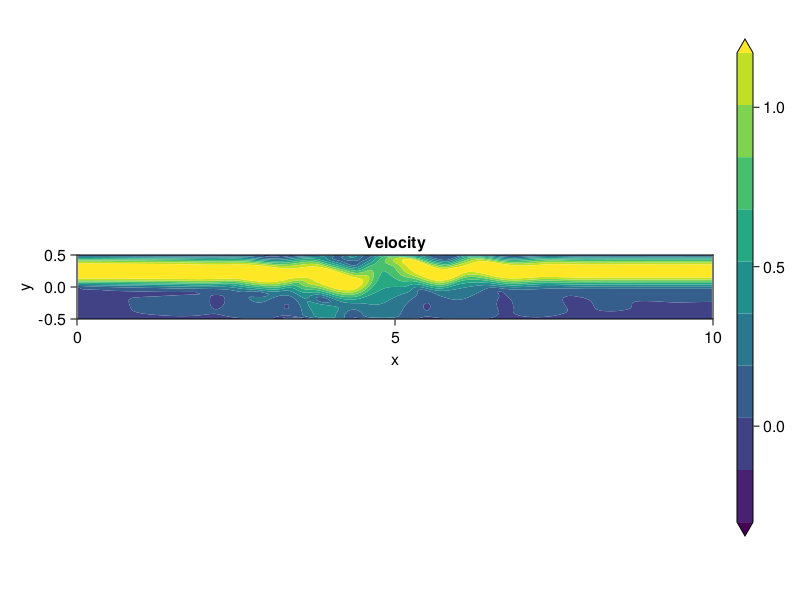

In [18]:
plot_velocity(setup, V, t_end)

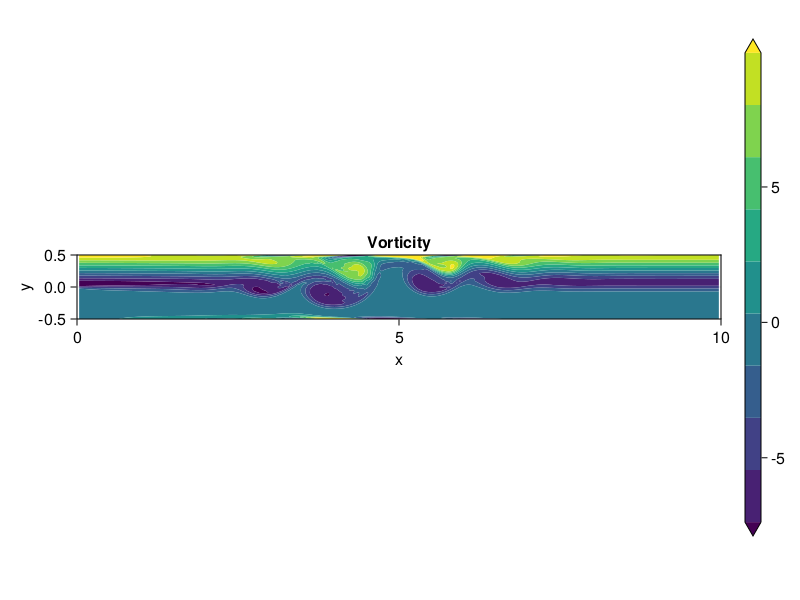

In [19]:
plot_vorticity(setup, V, tlims[2])

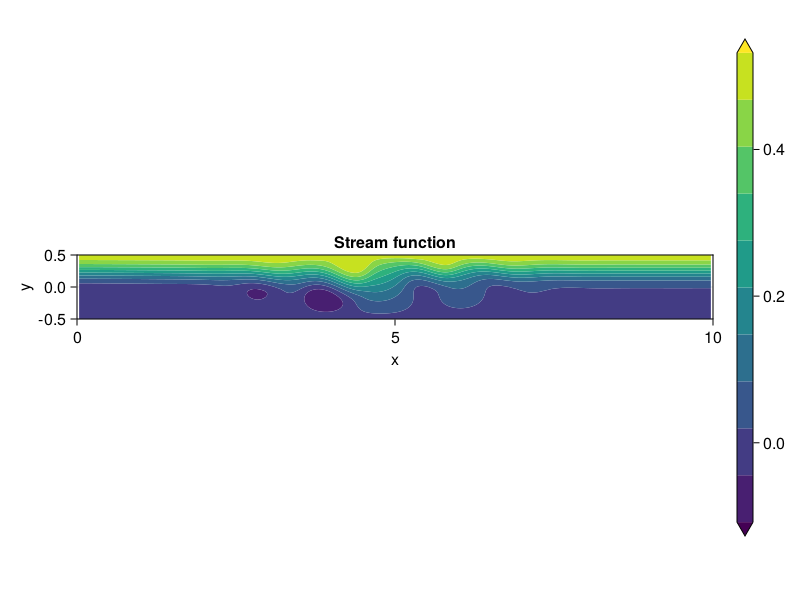

In [20]:
plot_streamfunction(setup, V, tlims[2])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*